# Descripcion del proyecto
Los datos se almacenan en tres archivos:

gold_recovery_train.csv — el dataset de entrenamiento descargado
gold_recovery_test.csv —el dataset de prueba descargado
gold_recovery_full.csv — el dataset fuente descargado
Los datos se indexan con la fecha y la hora de adquisición (date). Los parámetros cercanos en el tiempo suelen ser similares.

Algunos parámetros no están disponibles porque fueron medidos o calculados mucho más tarde. Por eso, algunas de las características que están presentes en el conjunto de entrenamiento pueden estar ausentes en el conjunto de prueba. El conjunto de prueba tampoco contiene objetivos.

El dataset fuente contiene los conjuntos de entrenamiento y prueba con todas las características.

Tienes a tu disposición los datos en bruto que solamente fueron descargados del almacén de datos. Antes de construir el modelo, comprueba que los datos sean correctos. Para ello, utiliza nuestras instrucciones.

Instrucciones del proyecto

# Tabla de contenido
1. [Prepara los datos](#Prepara-los-datos)

   1.1. [Abre los archivos y examina los datos](#Abre-los-datos-y-examina)
   
   1.2. [Calculo de recuperacion y EAM](#Calculo-de-recuperacion-y-EAM) 
   
   1.3. [Analiza las características no disponibles en el conjunto de prueba](#Analiza-las-caracteristicas-no-disponibles-en-el-conjunto-prueba) 

   1.4. [Preprocesamiento de los datos](#Preprocesamiento-de-los-datos)
   
2.[Analiza los datos](#Analiza-los-datos)
   
   2.1.[Observa el cambio de concentracion de los metales](#Obser-el-cambio-de-concentracion-de-los-metales)
   
   2.2.[Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba](#Compara-las-distribuciones-de-tamaño-de-las-particulas-de-la-alimentacion-en-el-conjunto-de-entrenamiento-prueba)
   
   2.3.[Considera las concentraciones totales de todas las sustancias en las diferentes etapas](#Considera-las-concentraciones-totales-de-todas-las-sustancias-en-las-diferentes-etapas)
   
3.[Construye el modelo](#Contruye-el-modelo)

   3.1.[Escribe una función para calcular el valor final de smape](#escribe-una-funcion-para-calcular-el-valor-final-de-smape)
   
   
   3.2.[Entrena diferentes modelos. Evalúalos aplicando la validación cruzada. Elige el mejor modelo y pruébalo utilizando la muestra de prueba](#Entrena-diferentes-modelos-Evalúalos-aplicando-la-validación-cruzada-Elige-el-mejor-modelo-y-pruébalo-utilizando-la-muestra-de-prueba) 
   
4. [Conclusión general](#Conclusión-general)

## Prepara los datos

### Abre los archivos y examina los datos.

In [1]:
# Cargar todas las librerías
import pandas as pd 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from scipy.stats import levene, bartlett
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.metrics import mean_absolute_error

In [2]:
# Ruta de acceso de los archivos
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv',sep=',', header=0)
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv',sep=',', header=0)
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv',sep=',', header=0)

In [3]:
# Informacion general de los respectivos datasets
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(gold_recovery_train))

Primera filas:
                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501  

In [4]:
# Informacion general de los respectivos datasets
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(gold_recovery_test))

Primera filas:
                  date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                      

In [5]:
# Informacion general de los respectivos datasets
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(gold_recovery_full))

Primera filas:
                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501  

0
None


### Comprueba que el cálculo de la recuperación sea correcto. Calcula la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento. Encuentra el EAM entre tus cálculos y los valores de la característica. Facilita los resultados.

In [6]:
gold_recovery_train.dropna(inplace=True)
gold_recovery_test.dropna(inplace=True)
gold_recovery_full.dropna(inplace=True)

In [7]:
#Verificar que no existan valores ausentes despues de la eliminacion
print('Valores ausentes en gold_recovery_train despues de la eliminacion:')
print(gold_recovery_train.isna().sum())
print('Valores ausentes en gold_recovery_test despues de la eliminacion:')
print(gold_recovery_test.isna().sum())
print('Valores ausentes en gold_recovery_full despues de la eliminacion:')
print(gold_recovery_full.isna().sum())

Valores ausentes en gold_recovery_train despues de la eliminacion:
date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64
Valores ausentes en gold_recovery_test despues de la eliminacion:
date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floa

In [8]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                11017 non-null  object 
 1   final.output.concentrate_ag                         11017 non-null  float64
 2   final.output.concentrate_pb                         11017 non-null  float64
 3   final.output.concentrate_sol                        11017 non-null  float64
 4   final.output.concentrate_au                         11017 non-null  float64
 5   final.output.recovery                               11017 non-null  float64
 6   final.output.tail_ag                                11017 non-null  float64
 7   final.output.tail_pb                                11017 non-null  float64
 8   final.output.tail_sol                               11017 non-null  float64


In [9]:
# Calcula la recuperacion
c = gold_recovery_train['rougher.output.concentrate_au']
f = gold_recovery_train['rougher.input.feed_au']
t = gold_recovery_train[ 'rougher.output.tail_au']

gold_recovery_train['calculated_recovery'] = (c * (f - t)) / (f * (c - t)) * 100
print(gold_recovery_train[['calculated_recovery', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.concentrate_au']])
print(gold_recovery_train[['calculated_recovery', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.concentrate_au']].describe())

       calculated_recovery  rougher.input.feed_au  rougher.output.tail_au  \
0                87.107763               6.486150                1.170244   
1                86.843261               6.478583                1.184827   
2                86.842308               6.362222                1.162562   
3                87.226430               6.118189                1.079755   
4                86.688794               5.663707                1.012642   
...                    ...                    ...                     ...   
16855            89.574376               5.335862                0.748633   
16856            87.724007               4.838619                0.771582   
16857            88.890579               4.525061                0.685059   
16858            89.858126               4.362781                0.567130   
16859            89.514960               4.365491                0.586439   

       rougher.output.concentrate_au  
0                          19.793808

Analisis de mis resultados en la recuperacion
a) El promedio de 82.74% lo que nos indica que el proceso de flotacion esta recuperando una cantidad significativa de oro que se encuentra presente en la alimentacion
b) La desviacion estandar de 13.60%  lo que nos indica una variabilidad en los resultados de recuperacion esto puede deberse a cambios en las condiciones del proceso variacion en el calidad del elemento

In [10]:
# Calcula el error absoluto medio (EAM) entre tus calculos y los valores de la característica

print('Error absoluto medio:', mean_absolute_error(gold_recovery_train['rougher.output.recovery'], gold_recovery_train['calculated_recovery']))

Error absoluto medio: 9.460144184559453e-15


Este valor nos indica que los calculos de recuperacion son casi identicos a los valores reales de recuperacion para el conjunto de entrenamiento

### Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

In [11]:
## Comparar columnas 
train_columns = set(gold_recovery_train.columns)
test_columns = set(gold_recovery_test.columns)
#Columnas que estan en el conjunto de entrenamiento y no en el conjunto de prueba
missing_columns = train_columns - test_columns
print('Columnas que faltan en el conjunto de prueba:')
print(missing_columns)


Columnas que faltan en el conjunto de prueba:
{'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 'rougher.output.concentrate_sol', 'rougher.output.tail_ag', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_pb', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_sol', 'rougher.calculation.au_pb_ratio', 'final.output.concentrate_pb', 'final.output.tail_au', 'rougher.output.tail_pb', 'primary_cleaner.output.tail_ag', 'final.output.tail_sol', 'final.output.concentrate_ag', 'final.output.concentrate_sol', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.tail_ag', 'secondary_cleaner.output.tail_au', 'final.output.recovery', 'primary_cleaner.output.tail_au', 'final.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.concentrate_pb', 'secondar

Las columnas faltantes en el conjunto de prueba 
a) No estan presentes las columnas objetivo
b) La presencia de las colas de flotacion para los 3 elementos y la solucion
c) primary cleaner  del concentrados y las colas de los 3 elementos
d) La columna creada de calculated recovery
e) El final de las colas y conentrados de los 3 elementos y solucion
f) Los calculos de flotacion floatbank11 y loatbank10 de sulfato a la alimentacion de oro  

In [12]:
# Tipo de datos de las columnas faltantes
for column in missing_columns:
    print(f"Tipo de dato de {column}: {gold_recovery_train[column].dtype}")

Tipo de dato de rougher.output.concentrate_ag: float64
Tipo de dato de rougher.output.concentrate_au: float64
Tipo de dato de rougher.output.tail_au: float64
Tipo de dato de rougher.output.concentrate_sol: float64
Tipo de dato de rougher.output.tail_ag: float64
Tipo de dato de primary_cleaner.output.concentrate_pb: float64
Tipo de dato de secondary_cleaner.output.tail_pb: float64
Tipo de dato de primary_cleaner.output.concentrate_ag: float64
Tipo de dato de primary_cleaner.output.tail_sol: float64
Tipo de dato de primary_cleaner.output.concentrate_sol: float64
Tipo de dato de rougher.calculation.au_pb_ratio: float64
Tipo de dato de final.output.concentrate_pb: float64
Tipo de dato de final.output.tail_au: float64
Tipo de dato de rougher.output.tail_pb: float64
Tipo de dato de primary_cleaner.output.tail_ag: float64
Tipo de dato de final.output.tail_sol: float64
Tipo de dato de final.output.concentrate_ag: float64
Tipo de dato de final.output.concentrate_sol: float64
Tipo de dato de rou

Los tipos de datos presentes en las columnas faltantes son flotantes los que nos indica valores numericos con decimales columnas imporatantes para el modelado y el analisis para el proceso de recuperacion de oro proporcionando imformacion cuantitativa sobre concentrados, recuperacion, flotaciones y colas

### Realiza el preprocesamiento de datos

In [13]:
# Función para calcular el porcentaje de valores ausentes
def calculate_missing_percentage(datos):
    missing_count = datos.isna().sum()
    total_count = len(datos)
    missing_percentage = (missing_count / total_count) * 100
    return missing_percentage

# Calcular y mostrar el porcentaje de valores ausentes para cada conjunto de datos
print("Porcentaje de valores ausentes en gold_recovery_train:")
print(calculate_missing_percentage(gold_recovery_train))

print("\nPorcentaje de valores ausentes en gold_recovery_test:")
print(calculate_missing_percentage(gold_recovery_test))

print("\nPorcentaje de valores ausentes en gold_recovery_full:")
print(calculate_missing_percentage(gold_recovery_full))

Porcentaje de valores ausentes en gold_recovery_train:
date                                          0.0
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
                                             ... 
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
calculated_recovery                           0.0
Length: 88, dtype: float64

Porcentaje de valores ausentes en gold_recovery_test:
date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_clean

In [14]:
 #Eliminar la columna 'date' de cada conjunto de datos
gold_recovery_train = gold_recovery_train.drop('date', axis=1)
gold_recovery_test = gold_recovery_test.drop('date', axis=1)
gold_recovery_full = gold_recovery_full.drop('date', axis=1)


In [15]:
# Resetear el indica
gold_recovery_train = gold_recovery_train.reset_index(drop=True)
gold_recovery_test = gold_recovery_test.reset_index(drop=True)
gold_recovery_full = gold_recovery_full.reset_index(drop=True)

## Analiza los datos



### Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

In [16]:
print(gold_recovery_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                                11017 non-null  float64


In [17]:
print(gold_recovery_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5383 entries, 0 to 5382
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5383 non-null   float64
 1   primary_cleaner.input.depressant            5383 non-null   float64
 2   primary_cleaner.input.feed_size             5383 non-null   float64
 3   primary_cleaner.input.xanthate              5383 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5383 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5383 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5383 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5383 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5383 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5383 non-null   float64
 10  primary_clea

In [18]:
print(gold_recovery_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16094 entries, 0 to 16093
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16094 non-null  float64
 1   final.output.concentrate_pb                         16094 non-null  float64
 2   final.output.concentrate_sol                        16094 non-null  float64
 3   final.output.concentrate_au                         16094 non-null  float64
 4   final.output.recovery                               16094 non-null  float64
 5   final.output.tail_ag                                16094 non-null  float64
 6   final.output.tail_pb                                16094 non-null  float64
 7   final.output.tail_sol                               16094 non-null  float64
 8   final.output.tail_au                                16094 non-null  float64


In [19]:
# Seleccionar columnas relevantes 
primary_concentrations = gold_recovery_train[['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb']]
final_concentrations = gold_recovery_train[['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb']]

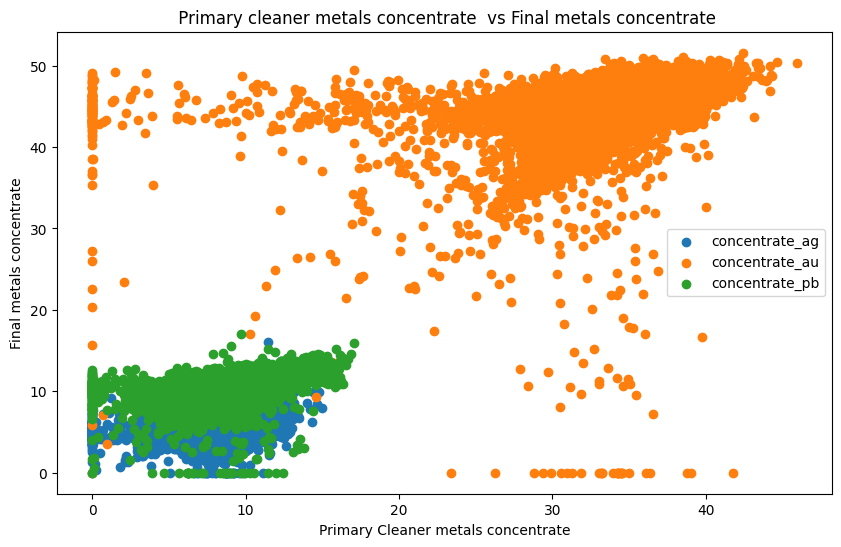

In [20]:
plt.figure(figsize=(10, 6))
# Scatter plot para primary_cleaner vs final concentrate
for i, metal in enumerate(primary_concentrations.columns):
    final_metal = final_concentrations.columns[i]
    plt.scatter(primary_concentrations[metal], final_concentrations[final_metal], label=metal.split('.')[-1])
plt.title(' Primary cleaner metals concentrate  vs Final metals concentrate')
plt.xlabel('Primary Cleaner metals concentrate')
plt.ylabel('Final metals concentrate')
plt.legend()
plt.show()

Observaciones del diagrama scatter plot donde se compara para primary_cleaner metals concentrate vs final metals concentrate
a) En el caso del oro es evidente muestra un incremento significativo en las concentracion final implica que el proceso esta optimizando para maximinzar su recuperacion
b) Para el plomo Se mantiene la concentracion en rangos bajos no hay incremento significativo  y no es prioritario en la etapa primaria de purificacion
c) La plata tiene cambios moderados pero igual no un gran incremento de la concentracion final y se correlaciona con la estapa primaria de purificacion

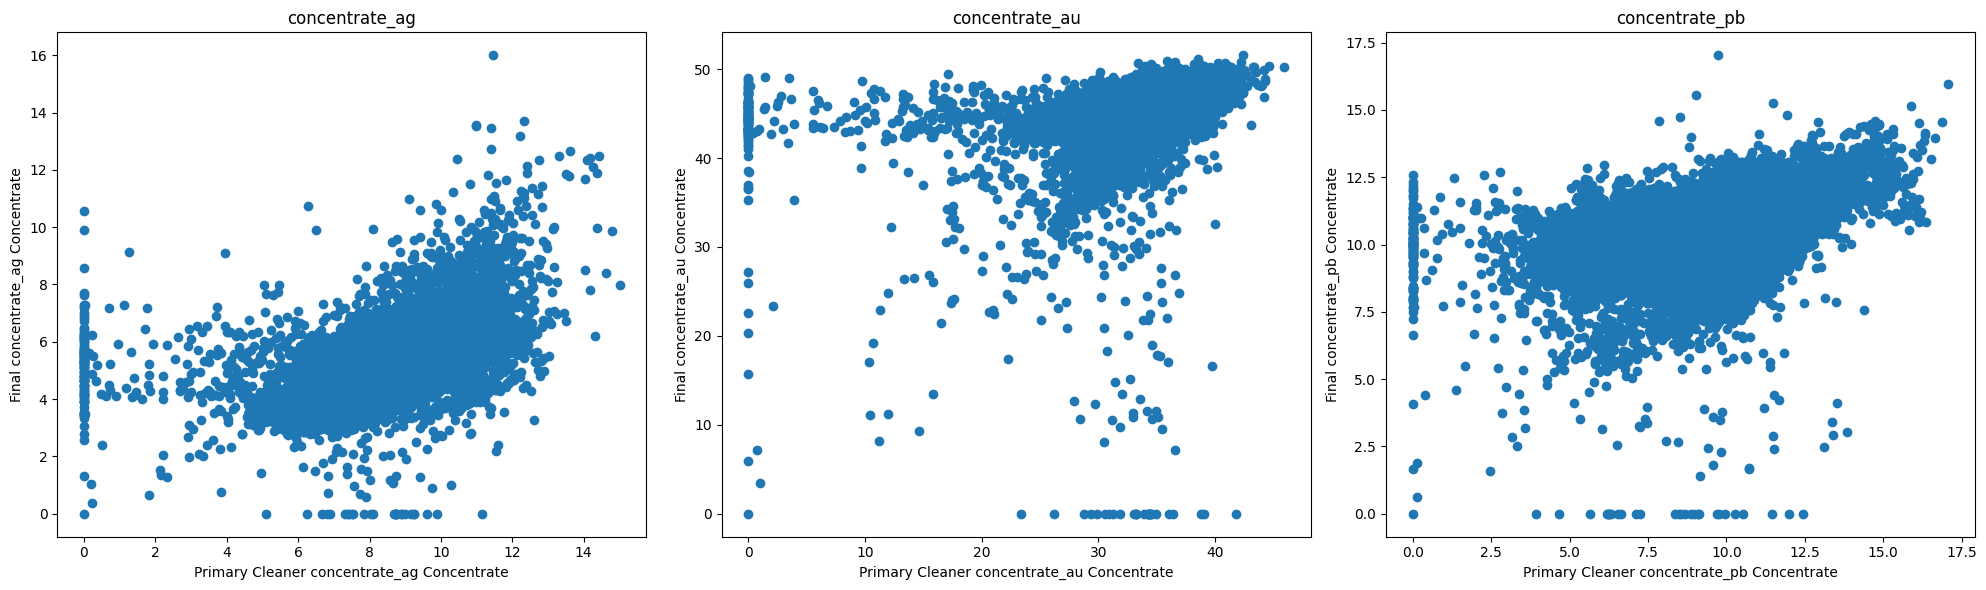

In [21]:
# Crear gráficos de dispersión para cada elemento
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for i, metal in enumerate(primary_concentrations.columns):
    final_metal = final_concentrations.columns[i]
    axs[i].scatter(primary_concentrations[metal], final_concentrations[final_metal])
    axs[i].set_title(f'{metal.split(".")[-1]}')
    axs[i].set_xlabel(f'Primary Cleaner {metal.split(".")[-1]} Concentrate')
    axs[i].set_ylabel(f'Final {metal.split(".")[-1]} Concentrate')

plt.tight_layout()
plt.show()

Se necesito analizar por separado el scatter-plot por elemento ya que en el diagrama anterior es notorio el aumento en el final del concentrado del oro, pero era necesario observar el comportamiento de de plata y plomo. Mediante el scatter plot de plata tiene mas concentracion entre 3-10 del final del concentrado siendo ese el mas bajo de los tres, le sigue el plomo donde tiene un ligero aumento al final del concentrado entre 7.5-13 pero de igual forma no tienen un incremento significativo

### Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

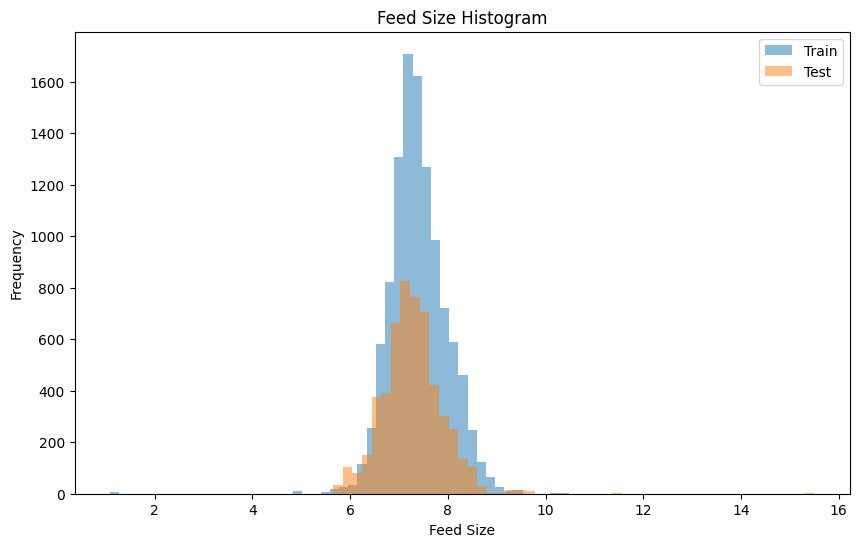

In [22]:
# Seleccionar columnas relevantes
train_feed_size = gold_recovery_train['primary_cleaner.input.feed_size']
test_feed_size = gold_recovery_test['primary_cleaner.input.feed_size']
# Ejecutar histogramas
plt.figure(figsize=(10, 6))
plt.hist(train_feed_size, alpha=0.5, label='Train', bins=50)
plt.hist(test_feed_size, alpha=0.5, label='Test', bins=50)
plt.title('Feed Size Histogram')
plt.xlabel('Feed Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()

La interpretacion del histograma que compra las distribuciones del tamaño de particulas de alimentacion de los conjuntos de entrenamiento y prueba
a) La mayor cantidad de particulas en ambos conjuntos en una rango bajo un poco mas de 6 -8 , el conjunto de entrenamiento tiene mas datos en comparacion con el conjunto de prueba principalmente en el tamaño como se oberva a simple vista
b) Las distribuciones de ambos conjuntos parecen estar alineados en cuanto a su rango y su forma esto nos quiere decir que los datos del conjunto de prueba estan representados de manera adecuada con el conjunto de entrenamiento 
pero se recominda una prueba de hipotesis para corroborar este grafico para que no afecte el analisis

Prueba para comparar varianzas 
H0: Las varianzas de train y test son iguales
H1: Las varianzas son diferentes 


In [23]:
# Prueba de Levene para igualdad de varianzas
levene_stat, levene_p = levene(train_feed_size, test_feed_size)
print(f"Levene:Estadistico={levene_stat}, P-valor={levene_p}")
#Nivel de significancia en alpha
alpha = 0.05
if levene_p > alpha:
    print('No se rechaza H0 en levene: las varianzas son iguales(usar pruebas parametricas)')
else:
    print('Se rechaza H0 en levene: las varianzas son diferentes(usar pruebas no parametricas)')
        


Levene:Estadistico=13.605655382634163, P-valor=0.00022623379199857314
Se rechaza H0 en levene: las varianzas son diferentes(usar pruebas no parametricas)


Hipotesis H0: Las medias de los tamaños de las particulas en el conjunto de entrenamiento y en el conjunto de prueba son iguales
Hipotesis H1: Las medias de los tamaños de las particulas en el conjunto de entrenamiento y en el conjunto de prueba son diferentes

In [24]:
# Prueba t de Student
t_stat, t_p = stats.ttest_ind(train_feed_size, test_feed_size)
#Nivel de significacia
alpha = 0.05
print(f"t-Student: Estadístico={t_stat}, P-valor={t_p}")
if t_p > alpha:
    print('No se rechaza HO: las medias son de los tamaños de las particulas en el conjunto de entrenamiento y en el conjunto de prueba son iguales')
else:
    print('Se rechaza HO:Las medias de los tamaños de las particulas en el conjunto de entrenamiento y en el conjunto de prueba son diferentes')

t-Student: Estadístico=13.046064156722506, P-valor=1.0429194009871561e-38
Se rechaza HO:Las medias de los tamaños de las particulas en el conjunto de entrenamiento y en el conjunto de prueba son diferentes


In [25]:
print(train_feed_size.mean())

7.396035641526691


In [26]:
print(test_feed_size.mean())

7.268669977430076


La diferencia entre las medias puede afectar a la evaluacion del modelo ya que el conjunto de entrenamiento y prueba no tienen la misma distribucion en cuanto a tamaño de particulas esto infuye en que el modelo no pueda generalizar de manera adecuada los nuevos datos.

### Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. ¿Observas algún valor anormal en la distribución total? Si es así, ¿merece la pena eliminar esos valores de ambas muestras? Describe los resultados y elimina las anomalías.

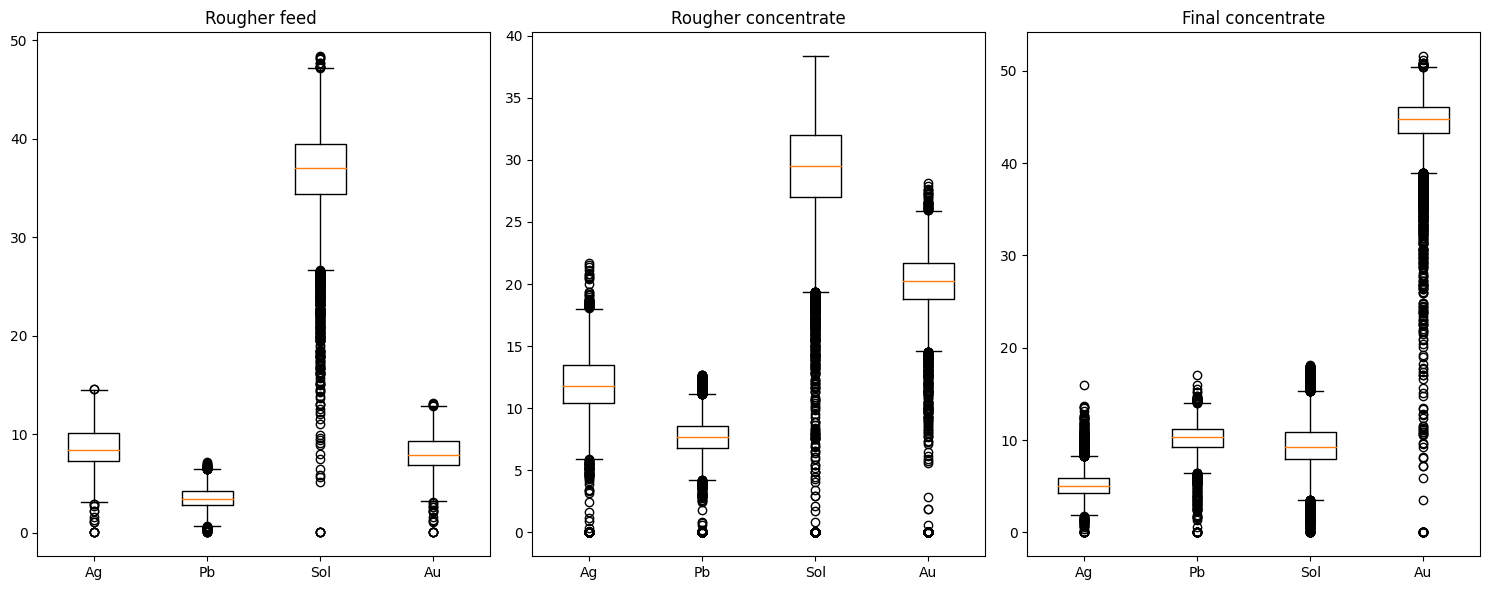

In [27]:
# Seleccionar columnas relevantes para el análisis
rougher_input = gold_recovery_train[['rougher.input.feed_ag', 
                                     'rougher.input.feed_pb', 
                                     'rougher.input.feed_sol', 
                                     'rougher.input.feed_au']]

rougher_output = gold_recovery_train[['rougher.output.concentrate_ag', 
                                      'rougher.output.concentrate_pb', 
                                      'rougher.output.concentrate_sol', 
                                      'rougher.output.concentrate_au']]

final_output = gold_recovery_train[['final.output.concentrate_ag', 
                                    'final.output.concentrate_pb', 
                                    'final.output.concentrate_sol', 
                                    'final.output.concentrate_au']]

# Plotear gráficos de cajas y bigotes
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.boxplot([rougher_input['rougher.input.feed_ag'], 
             rougher_input['rougher.input.feed_pb'], 
             rougher_input['rougher.input.feed_sol'], 
             rougher_input['rougher.input.feed_au']], 
            labels=['Ag', 'Pb', 'Sol', 'Au'])
plt.title('Rougher feed ')

plt.subplot(1, 3, 2)
plt.boxplot([rougher_output['rougher.output.concentrate_ag'], 
             rougher_output['rougher.output.concentrate_pb'], 
             rougher_output['rougher.output.concentrate_sol'], 
             rougher_output['rougher.output.concentrate_au']], 
            labels=['Ag', 'Pb', 'Sol', 'Au'])
plt.title('Rougher concentrate')

plt.subplot(1, 3, 3)
plt.boxplot([final_output['final.output.concentrate_ag'], 
             final_output['final.output.concentrate_pb'], 
             final_output['final.output.concentrate_sol'], 
             final_output['final.output.concentrate_au']], 
            labels=['Ag', 'Pb', 'Sol', 'Au'])
plt.title('Final concentrate')

plt.tight_layout()
plt.show()

Filas antes de eliminar outliers: 11017
Filas después de eliminar outliers: 10450


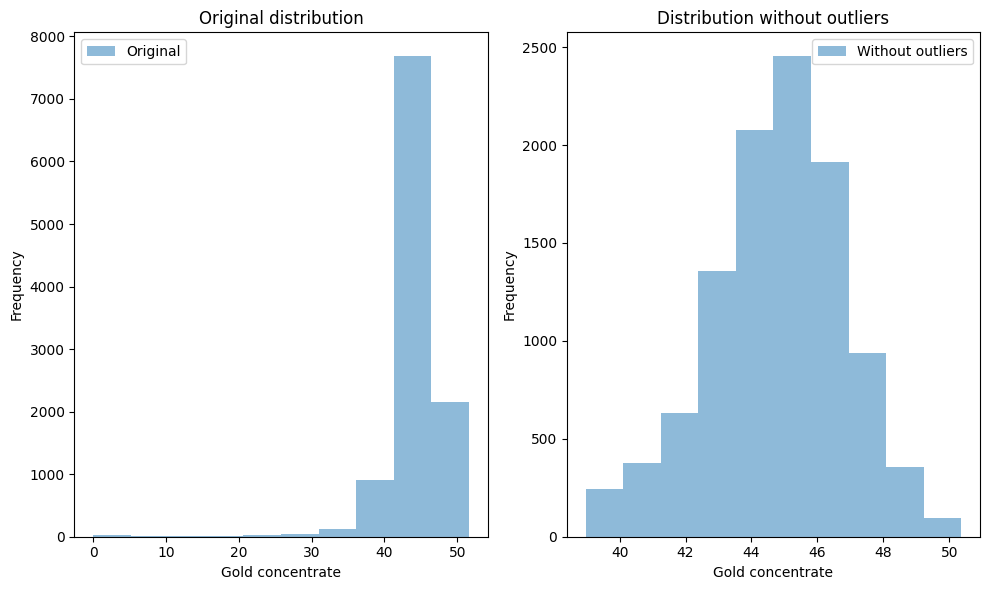

In [28]:
final_gold_concentration = gold_recovery_train['final.output.concentrate_au']
#Funcion para eliminar outliers
def eliminate_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[columna] >= lower_bound) & (df[columna] <= upper_bound)]
#Aplicar la funcion a la columna de concentracion de Au
clean_gold_recovery_train = eliminate_outliers(gold_recovery_train, 'final.output.concentrate_au')
#Verificar el numero de filas antes y despues de eliminar los outliers
print(f"Filas antes de eliminar outliers: {len(gold_recovery_train)}")
print(f"Filas después de eliminar outliers: {len(clean_gold_recovery_train)}")
#Implementar histogramas para comparar distribuciones
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(gold_recovery_train['final.output.concentrate_au'], alpha=0.5, label='Original')
plt.title ('Original distribution')
plt.xlabel('Gold concentrate')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(clean_gold_recovery_train['final.output.concentrate_au'], alpha=0.5, label='Without outliers')
plt.title('Distribution without outliers')
plt.xlabel('Gold concentrate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

Observaciones los histogramas antes y despues de la eliminacion de outliers para el concentrado final del oro
a) Es evidente que la mayor concentracion de valores se encuentas 40 y 50  y los valores atipicos por debajo de 10 (Original distribution)
b) En el histograma (Distribution without outliers) parece estar mas normalizada y ajustada, con los valores fuera del rango eliminado (posibles errores o casos extremos)
c) La eliminacion de outliers mejoro notablemente la representacion de los datos eliminado datos que podrian sesgar el analisis de mi modelo predictivo

## Construye el modelo

In [29]:
# Definir las columnas objetivo
target_columns = ['rougher.output.recovery', 'final.output.recovery']

# Verificar si las columnas objetivo están en gold_recovery_test
if all(column in gold_recovery_test.columns for column in target_columns):
    print("Las columnas objetivo ya están en gold_recovery_test.")
else:
    print("Las columnas objetivo no están en gold_recovery_test.")

# Agregar columnas objetivo a gold_recovery_test
target_test = gold_recovery_full[target_columns].loc[gold_recovery_test.index].reset_index(drop=True)
gold_recovery_test[target_columns] = target_test

# Verificar nuevamente
if all(column in gold_recovery_test.columns for column in target_columns):
    print("Las columnas objetivo ahora estan en gold_recovery_test.")
else:
    print("Las columnas objetivo todavia no estan en gold_recovery_test.")

Las columnas objetivo no están en gold_recovery_test.
Las columnas objetivo ahora estan en gold_recovery_test.


In [30]:
#Preparar las caracteristicas y el objetivo
features_rougher_recovery = gold_recovery_train.drop(['rougher.output.recovery'], axis=1)
target_rougher_recovery = gold_recovery_train['rougher.output.recovery']
print(type(target_rougher_recovery))

<class 'pandas.core.series.Series'>


In [31]:
features_train_rougher_recovery, features_test_rougher_recovery, target_train_rougher_recovery, target_test_rougher_recovery = train_test_split(features_rougher_recovery, target_rougher_recovery, test_size=0.2, random_state=12345)

In [32]:
print(features_train_rougher_recovery.shape)
print(target_train_rougher_recovery.shape)
print(features_test_rougher_recovery.shape)
print(target_test_rougher_recovery.shape)

(8813, 86)
(8813,)
(2204, 86)
(2204,)


In [33]:
# Seleccionar columnas numéricas
numeric_columns_rougher = features_train_rougher_recovery.select_dtypes(include=['float64']).columns

In [34]:
scaler_rougher = StandardScaler()

In [35]:
scaler_rougher = scaler_rougher.fit(features_train_rougher_recovery[numeric_columns_rougher])
features_train_rougher_recovery = scaler_rougher.transform(features_train_rougher_recovery[numeric_columns_rougher])
features_test_rougher = scaler_rougher.transform(features_test_rougher_recovery[numeric_columns_rougher])

In [36]:
features_train_rougher_recovery= pd.DataFrame(features_train_rougher_recovery, columns=numeric_columns_rougher)
features_test_rougher_recovery= pd.DataFrame(features_test_rougher_recovery, columns=numeric_columns_rougher)

features_train_rougher_recovery[numeric_columns_rougher] = features_train_rougher_recovery
features_test_rougher_recovery[numeric_columns_rougher] = features_test_rougher_recovery
print(features_train_rougher_recovery)
print(features_test_rougher_recovery)

      final.output.concentrate_ag  final.output.concentrate_pb  \
0                        2.343972                     1.296024   
1                       -0.080225                    -2.403904   
2                       -1.648164                    -1.955693   
3                        0.806204                     0.985977   
4                       -0.224204                    -0.485399   
...                           ...                          ...   
8808                    -0.943315                    -1.897008   
8809                     0.026980                     0.664442   
8810                    -0.409881                    -0.557130   
8811                    -0.676084                    -0.184898   
8812                     0.432325                    -0.124667   

      final.output.concentrate_sol  final.output.concentrate_au  \
0                         0.830250                    -1.813371   
1                        -0.175232                     1.127743   
2     

In [37]:
#Preparar las caracteristicas y el objetivo
features_final_recovery = gold_recovery_train.drop(['rougher.output.recovery'], axis=1)
target_final_recovery = gold_recovery_train['rougher.output.recovery']
print(type(target_final_recovery))

<class 'pandas.core.series.Series'>


In [38]:
features_train_final_recovery, features_test_final_recovery, target_train_final_recovery, target_test_final_recovery = train_test_split(features_final_recovery, target_final_recovery, test_size=0.2, random_state=12345)

In [39]:
print(features_train_final_recovery.shape)
print(target_train_final_recovery.shape)
print(features_test_final_recovery.shape)
print(target_test_final_recovery .shape)

(8813, 86)
(8813,)
(2204, 86)
(2204,)


In [40]:
numeric_columns_final = features_train_final_recovery.select_dtypes(include=['float64']).columns

In [41]:
scaler_final = StandardScaler()


In [42]:
scaler_final = scaler_final.fit(features_train_final_recovery[numeric_columns_final])
features_train_final_recovery = scaler_final.transform(features_train_final_recovery[numeric_columns_final])
features_test_final_recovery= scaler_final.transform(features_test_final_recovery[numeric_columns_final])


In [43]:
features_train_final_recovery = pd.DataFrame(features_train_final_recovery, columns=numeric_columns_final)
features_test_final_recovery= pd.DataFrame(features_test_final_recovery, columns=numeric_columns_final)
features_train_final_recovery[numeric_columns_final] = features_train_final_recovery
features_test_final_recovery[numeric_columns_final] = features_test_final_recovery
print(features_train_final_recovery)
print(features_test_final_recovery)

      final.output.concentrate_ag  final.output.concentrate_pb  \
0                        2.343972                     1.296024   
1                       -0.080225                    -2.403904   
2                       -1.648164                    -1.955693   
3                        0.806204                     0.985977   
4                       -0.224204                    -0.485399   
...                           ...                          ...   
8808                    -0.943315                    -1.897008   
8809                     0.026980                     0.664442   
8810                    -0.409881                    -0.557130   
8811                    -0.676084                    -0.184898   
8812                     0.432325                    -0.124667   

      final.output.concentrate_sol  final.output.concentrate_au  \
0                         0.830250                    -1.813371   
1                        -0.175232                     1.127743   
2     

### Escribe una función para calcular el valor final de sMAPE.

In [44]:
def calculate_smape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2)))
# Calcular sMAPE final combinado
def calculate_final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final


###  Linear regression model

In [45]:
rougher_linear_regression = LinearRegression()
final_linear_regression = LinearRegression()

# Validacion cruzada para cada modelo
scores_linear_rougher = cross_val_score(rougher_linear_regression, features_train_rougher_recovery, target_train_rougher_recovery, cv=5, scoring='neg_mean_squared_error')
scores_linear_final = cross_val_score(final_linear_regression, features_train_final_recovery, target_train_final_recovery, cv=5, scoring='neg_mean_squared_error')

# Imprimir resultados de validacion cruzada
print(f"Model: Linear Regression - Rougher")
print(f"Cross-validation scores: {scores_linear_rougher}")
print(f"Mean score: {-scores_linear_rougher.mean()}")

print(f"Model: Linear Regression - Final")
print(f"Cross-validation scores: {scores_linear_final}")
print(f"Mean score: {-scores_linear_final.mean()}")

Model: Linear Regression - Rougher
Cross-validation scores: [-1.78168911e-27 -1.47573100e-27 -1.79688822e-27 -9.54584374e-28
 -1.37985651e-27]
Mean score: 1.4777498442669865e-27
Model: Linear Regression - Final
Cross-validation scores: [-1.78168911e-27 -1.47573100e-27 -1.79688822e-27 -9.54584374e-28
 -1.37985651e-27]
Mean score: 1.4777498442669865e-27


In [46]:
# Entrenar modelos con todo el conjunto de entrenamiento
rougher_linear_regression.fit(features_train_rougher_recovery, target_train_rougher_recovery)
final_linear_regression.fit(features_train_final_recovery, target_train_final_recovery)

# Hacer predicciones
y_rougher_linear_pred = rougher_linear_regression.predict(features_test_rougher_recovery)
y_final_linear_pred = final_linear_regression.predict(features_test_final_recovery)

In [47]:
smape_rougher_linear = calculate_smape(target_test_rougher_recovery, y_rougher_linear_pred)
smape_final_linear = calculate_smape(target_test_final_recovery, y_final_linear_pred)
smape_combine_final = calculate_final_smape(smape_rougher_linear, smape_final_linear)

print(f"Model: Linear regression")
print(f"sMAPE Rougher: {smape_rougher_linear}")
print(f"sMAPE Final: {smape_final_linear}")
print(f"sMAPE final combinado: {smape_combine_final}")


Model: Linear regression
sMAPE Rougher: 1.7485673081686552
sMAPE Final: 0.03001364256480257
sMAPE final combinado: 0.4596520589657657


### Decision tree model

In [48]:
# Inicializar variables para almacenar la mejor profundidad y puntuacion
best_mean_score_rougher = float('inf')
best_mean_score_final = float('inf')
best_depth_rougher = None
best_depth_final = None

# Definir hiperparámetros para el arbol de decision
for depth in range(1, 11):
    decision_tree_rougher = DecisionTreeRegressor(random_state=12345, min_samples_split=10, min_samples_leaf=5, max_depth=depth)
    decision_tree_final = DecisionTreeRegressor(random_state=12345, min_samples_split=10, min_samples_leaf=5, max_depth=depth)
    
    # Validacion cruzada para cada modelo
    scores_tree_rougher = cross_val_score(decision_tree_rougher, features_train_rougher_recovery, target_train_rougher_recovery, cv=5, scoring='neg_mean_squared_error')
    scores_tree_final = cross_val_score(decision_tree_final, features_train_final_recovery, target_train_final_recovery, cv=5, scoring='neg_mean_squared_error')
    
    # Imprimir resultados de validacion cruzada
    print(f"Model: Decision Tree with depth {depth} - Rougher")
    print(f"Cross-validation scores: {scores_tree_rougher}")
    print(f"Mean score: {-scores_tree_rougher.mean()}")
    
    # Actualizar la mejor profundidad si la puntuacion es mejor
    if -scores_tree_rougher.mean() < best_mean_score_rougher:
        best_mean_score_rougher = -scores_tree_rougher.mean()
        best_depth_rougher = depth

    if -scores_tree_final.mean() < best_mean_score_final:
        best_mean_score_final = -scores_tree_final.mean()
        best_depth_final = depth
        
# Entrenar modelos con los mejores hiperparametros y todo el conjunto de entrenamiento
decision_tree_rougher_best = DecisionTreeRegressor(random_state=12345, min_samples_split=10, min_samples_leaf=5, max_depth=best_depth_rougher)
decision_tree_final_best = DecisionTreeRegressor(random_state=12345, min_samples_split=10, min_samples_leaf=5, max_depth=best_depth_final)

decision_tree_rougher_best.fit(features_train_rougher_recovery, target_train_rougher_recovery)
decision_tree_final_best.fit(features_train_final_recovery, target_train_final_recovery)

# Predecir valores con los mejores modelos
y_rougher_tree_pred_best = decision_tree_rougher_best.predict(features_test_rougher_recovery)
y_final_tree_pred_best = decision_tree_final_best.predict(features_test_final_recovery)

Model: Decision Tree with depth 1 - Rougher
Cross-validation scores: [-54.39452235 -55.68860553 -50.39430544 -51.00071602 -51.96030979]
Mean score: 52.68769182808654
Model: Decision Tree with depth 2 - Rougher
Cross-validation scores: [-21.85977772 -21.77250399 -19.08552159 -18.67325848 -19.49301886]
Mean score: 20.176816128711806
Model: Decision Tree with depth 3 - Rougher
Cross-validation scores: [-7.53504608 -7.1919954  -6.11875998 -6.38674915 -6.02079306]
Mean score: 6.65066873385901
Model: Decision Tree with depth 4 - Rougher
Cross-validation scores: [-2.45246293 -2.18599541 -1.96426397 -1.96333153 -1.89701372]
Mean score: 2.0926135134109662
Model: Decision Tree with depth 5 - Rougher
Cross-validation scores: [-0.95195549 -0.64422734 -0.59371541 -0.54928003 -0.51457279]
Mean score: 0.6507502123324234
Model: Decision Tree with depth 6 - Rougher
Cross-validation scores: [-0.53450691 -0.20114158 -0.20110249 -0.16389114 -0.13522004]
Mean score: 0.24717242999763506
Model: Decision Tree

In [49]:
#Calcula sMAPE
smape_tree_rougher_best = calculate_smape(target_test_rougher_recovery, y_rougher_tree_pred_best)
smape_final_tree_best = calculate_smape(target_test_final_recovery, y_final_tree_pred_best)
smape_final_combine_tree_best = calculate_final_smape(smape_tree_rougher_best, smape_final_tree_best)
print(f"Model: Decision Tree with best depth {best_depth_rougher} (Rougher) and {best_depth_final} (Final)")
print(f"sMAPE Rougher: {smape_tree_rougher_best}")
print(f"sMAPE Final: {smape_final_tree_best}")
print(f"sMAPE Final combinado: {smape_final_combine_tree_best}")

Model: Decision Tree with best depth 10 (Rougher) and 10 (Final)
sMAPE Rougher: 0.20660622741361898
sMAPE Final: 0.0013639115162734157
sMAPE Final combinado: 0.05267449049060981


### Random forest model

In [50]:
best_n_estimators_rougher = None
best_max_depth_rougher = None
best_mean_score_rougher = float('inf')

best_n_estimators_final = None
best_max_depth_final = None
best_mean_score_final = float('inf')
# Iterar sobre diferentes hiperparametros
for est in range(10, 50, 10):
    for depth in range(1, 11):
        random_forest_rougher = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
        random_forest_final = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)

        # Validacion cruzada para cada modelo
        scores_forest_rougher = cross_val_score(random_forest_rougher, features_train_rougher_recovery, target_train_rougher_recovery, cv=5, scoring='neg_mean_squared_error')
        scores_final_forest = cross_val_score(random_forest_final, features_train_final_recovery, target_train_final_recovery, cv=5, scoring='neg_mean_squared_error')

        # Imprimir resultados de validacion cruzada
        print(f"Model: Random forest with {est} trees and depth {depth} - Rougher")
        print(f"Cross-validation scores: {scores_forest_rougher}")
        print(f"Mean score: {-scores_forest_rougher.mean()}")

        print(f"Model: Random forest with {est} trees and depth {depth} - Final")
        print(f"Cross-validation scores: {scores_final_forest}")
        print(f"Mean score: {-scores_final_forest.mean()}")

        # Actualizar los mejores hiperparametros si la puntuacion es mejor
        if -scores_forest_rougher.mean() < best_mean_score_rougher:
            best_mean_score_rougher = -scores_forest_rougher.mean()
            best_n_estimators_rougher = est
            best_max_depth_rougher = depth

        if -scores_final_forest.mean() < best_mean_score_final:
            best_mean_score_final = -scores_final_forest.mean()
            best_n_estimators_final = est
            best_max_depth_final = depth

Model: Random forest with 10 trees and depth 1 - Rougher
Cross-validation scores: [-54.36910764 -55.67698915 -49.80465643 -50.38988512 -51.9765741 ]
Mean score: 52.44344249044491
Model: Random forest with 10 trees and depth 1 - Final
Cross-validation scores: [-54.36910764 -55.67698915 -49.80465643 -50.38988512 -51.9765741 ]
Mean score: 52.44344249044491
Model: Random forest with 10 trees and depth 2 - Rougher
Cross-validation scores: [-21.22853091 -21.13508376 -18.45144862 -17.96571985 -18.98074657]
Mean score: 19.552305941014836
Model: Random forest with 10 trees and depth 2 - Final
Cross-validation scores: [-21.22853091 -21.13508376 -18.45144862 -17.96571985 -18.98074657]
Mean score: 19.552305941014836
Model: Random forest with 10 trees and depth 3 - Rougher
Cross-validation scores: [-6.89703376 -6.44166363 -5.52576641 -5.67086986 -5.53802426]
Mean score: 6.014671584382881
Model: Random forest with 10 trees and depth 3 - Final
Cross-validation scores: [-6.89703376 -6.44166363 -5.5257

Model: Random forest with 30 trees and depth 5 - Rougher
Cross-validation scores: [-0.50793772 -0.29583493 -0.26952835 -0.22854192 -0.2242408 ]
Mean score: 0.3052167444420468
Model: Random forest with 30 trees and depth 5 - Final
Cross-validation scores: [-0.50793772 -0.29583493 -0.26952835 -0.22854192 -0.2242408 ]
Mean score: 0.3052167444420468
Model: Random forest with 30 trees and depth 6 - Rougher
Cross-validation scores: [-0.27690204 -0.08531588 -0.06763761 -0.05498826 -0.0283334 ]
Mean score: 0.10263543883357595
Model: Random forest with 30 trees and depth 6 - Final
Cross-validation scores: [-0.27690204 -0.08531588 -0.06763761 -0.05498826 -0.0283334 ]
Mean score: 0.10263543883357595
Model: Random forest with 30 trees and depth 7 - Rougher
Cross-validation scores: [-0.24937581 -0.06393457 -0.04473975 -0.03950405 -0.00392856]
Mean score: 0.08029654739227
Model: Random forest with 30 trees and depth 7 - Final
Cross-validation scores: [-0.24937581 -0.06393457 -0.04473975 -0.03950405 

In [51]:
# Entrenar modelos con los mejores hiperparametros y todo el conjunto de entrenamiento
random_forest_rougher_best = RandomForestRegressor(n_estimators=best_n_estimators_rougher, max_depth=best_max_depth_rougher, random_state=12345)
random_forest_final_best = RandomForestRegressor(n_estimators=best_n_estimators_final, max_depth=best_max_depth_final, random_state=12345)

random_forest_rougher_best.fit(features_train_rougher_recovery, target_train_rougher_recovery)
random_forest_final_best.fit(features_train_final_recovery, target_train_final_recovery)

# Predecir valores
y_rougher_forest_pred_best = random_forest_rougher_best.predict(features_test_rougher_recovery)
y_final_forest_pred_best = random_forest_final_best.predict(features_test_final_recovery)

In [52]:
# Calcular sMAPE con los mejores modelos
smape_rougher_forest = calculate_smape(target_test_rougher_recovery, y_rougher_forest_pred_best)
smape_final_forest = calculate_smape(target_test_final_recovery, y_final_forest_pred_best)
smape_final_combine_forest = calculate_final_smape(smape_rougher_forest, smape_final_forest)

print(f"Model: Random forest with best depth {best_max_depth_rougher}, trees {best_n_estimators_rougher} (Rougher), depth {best_max_depth_final}, trees {best_n_estimators_final} (Final)")
print(f"sMAPE Rougher: {smape_rougher_forest}")
print(f"sMAPE Final: {smape_final_forest}")
print(f"sMAPE Final combinado: {smape_final_combine_forest}")

Model: Random forest with best depth 10, trees 20 (Rougher), depth 10, trees 20 (Final)
sMAPE Rougher: 0.20431111655918474
sMAPE Final: 0.0019558709826599154
sMAPE Final combinado: 0.05254468237679112


In [54]:
# Crear un DataFrame para resumir los resultados
data = {
    'Modelo': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'sMAPE Rougher': [1.7485673081686552, 0.20660622741361898, 0.20431111655918474],
    'sMAPE Final': [0.03001364256480257, 0.0013639115162734157, 0.0019558709826599154],
    'sMAPE Final Combinado': [0.4596520589657657, 0.05267449049060981, 0.05254468237679112]
}

df_results = pd.DataFrame(data)

# Imprimir el DataFrame
print(df_results)

              Modelo  sMAPE Rougher  sMAPE Final  sMAPE Final Combinado
0  Linear Regression       1.748567     0.030014               0.459652
1      Decision Tree       0.206606     0.001364               0.052674
2      Random Forest       0.204311     0.001956               0.052545


Dado los resultados obtenido para sMAPE final combinado para los 3 modelos es evidente que la seleccion del mejor modelo el que presenta mejor precision es Ramdom forest aunque la diferencia es minima entre Decision tree, Zyfra al escoger este modelo puede optimizar la produccion al identificar los parametros que influyen en la extraccion de oro y ajustarlos para conseguir mayor eficiencia 

## Conclusion general

El sMAPE final combinado donde se une sMAPE rougher y sMAPE final nos permite evaluar de la manera en como el modelo predice la cantidad de oro extraido en todo el proceso. Al identificar el mejor modelo  Zyfra  puede optimizar el proceso reduciendo costos al minizar parametros que no contribuyen a la extraccion de oro, tambien de extraccion ajustando parametros en la etapa de rougher y final para maximizar la eficiencia del modelo y minimizar errores en la prediccion